***Importing all libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import re

import mysql.connector as mc

In [2]:
# pylab is for resizing the shape of plots

%matplotlib inline
%pylab inline 


Populating the interactive namespace from numpy and matplotlib


/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


***Querying SQL to fetch data***

In [4]:
#Remember to open the database befor running

connection = mc.connect(host = "localhost",
                        user = "root",
                        passwd = "root",
                        database = "Test_DB",
                        raise_on_warnings = True,
                        port = 8889)
                       
cursor = connection.cursor()
cursor.execute("SELECT * FROM page_data") 
raw_dataset = cursor.fetchall() 

cursor.close()
connection.close()

***Creating the dataset***

The data that comes from the DB is a little messy. The way it is organized is not perfect. 
Each row in this zs_ds dataset is composed by a long string. This string has the name of the products and it's price.
Also, each row is associated with a subcategory from zonasul.com

E.g.: zona sul has all this category (Bebê|Bebidas|Biscoitos & Snacks|Carnes & Peixes|Cestas|Chocolateria & Confeitaria|Congelados|Conservas & Antepastos|Flores & Plantas|Frios & Laticínios|Hortifruti|Grãos & Cereais|Limpeza|Massas|Matinais|Óleos & Temperos|Pães & Bolos|Perfumaria & Higiene|Pet Shop|Saúde e Bem Estar|Sopas|Utilidades|Vinhos)

Inside "Bebê" there are many subcategories (Higiêne infantil|Leite infantil|Papinhas). Each row of the dataset is related with one subcategoru. Each row will have a long string with all the product name and prices 

**zs_ds['Product'][0]**

' P\\xc3\\xa1gina inicial Zona Sul Sabonete Infantil Johnson &amp; Johnson Baby 80 g  2,85 Len\\xc3\\xa7os Umedecidos Infantis Huggies Turma da M\\xc3\\xb4nica Aloe Vera Com 48 Unidades  10,49 Sabonete L\\xc3\\xadquido Infantil Granado Beb\\xc3\\xaa Tradicional Pump 250 mL   15,35 Len\\xc3\\xa7os Umedecidos Infantis Johnson s Baby Rec\\xc3\\xa9m Nascido Pacote Com 50 Unidades  11,69 Sabonete L\\xc3\\xadquido Infantil Granado Beb\\xc3\\xaa Pump 250 mL   Len\\xc3\\xa7os Umedecidos Infantis Johnson s Baby Hora do Sono Pacote Com 50 Unidades  Shampoo Infantil Johnson s Baby 200 mL  10,98 Sabonete Infantil Vegetal Glicerinado Hipoalerg\\xc3\\xaanico Granado Beb\\xc3\\xaa 90 g  4,09 Shampoo Infantil Sem Corantes Granado Beb\\xc3\\xaa 250 mL  17,45 Sabonete L\\xc3\\xadquido Infantil Granado Beb\\xc3\\xaa Erva Doce Pump 250 mL   Shampoo Infantil com Camomila Johnson s Baby para Cabelos Claros 200 mL  10,59 Sabonete L\\xc3\\xadquido Infantil Johnson s Baby Pump 200 mL   13,55 Shampoo Infantil Palmolive Naturals Kids para Todo Tipo de Cabelo 350 mL  12,05 Condicionador de Cabelos Infantil Johnson s Baby 200 mL  16,55 Sabonete Infantil Dove Baby Hidrata\\xc3\\xa7\\xc3\\xa3o enriquecida Caixa 75 g  2,65 Zona Sul'
In [5]:

In [5]:
zs_ds = pd.DataFrame(raw_dataset)
zs_ds.columns = ( "BD_ID", "Product","Day","Month")
zs_ds.tail()

,BD_ID,Product,Day,Month
5996,7205,P\xc3\xa1gina inicial Zona Sul Pote Herm\xc3\...,m06,11
5997,7206,P\xc3\xa1gina inicial Zona Sul F\xc3\xb3sforo...,m06,11
5998,7207,P\xc3\xa1gina inicial Zona Sul Ta\xc3\xa7a de...,m06,11
5999,7208,P\xc3\xa1gina inicial Zona Sul Espumante Bran...,m06,11
6000,7209,P\xc3\xa1gina inicial Zona Sul Vinho Branco D...,m06,11


In [6]:
zs_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 4 columns):
BD_ID      6001 non-null int64
Product    6001 non-null object
Day        6001 non-null object
Month      6001 non-null object
dtypes: int64(1), object(3)
memory usage: 187.6+ KB


***Removing this string "P\xc3\xa1gina inicial Zona Sul" / (just some cleaning)***

In [7]:
def name_replace (string):
    return string.replace("P\\xc3\\xa1gina inicial Zona Sul ","")

def name_replace_zonasul (string):
    return string.replace("Zona Sul","")


zs_ds['Product'] = zs_ds['Product'].apply(lambda x: name_replace(x))
zs_ds['Product'] = zs_ds['Product'].apply(lambda x: name_replace_zonasul(x))
zs_ds['Subcategory'] = zs_ds['Product'].apply(lambda x : ' '.join(x.split(' ')[1:4])) #creating a subcategory column with the three first strings in the product

zs_ds

,BD_ID,Product,Day,Month,Subcategory
0,1209,Sabonete Infantil Johnson &amp; Johnson Baby ...,29,09,Sabonete Infantil Johnson
1,1210,Papinha Nestl\xc3\xa9 Banana com Aveia Pote 1...,29,09,Papinha Nestl\xc3\xa9 Banana
2,1211,Leite em P\xc3\xb3 Instant\xc3\xa2neo Integra...,29,09,Leite em P\xc3\xb3
3,1212,"Cerveja Bohemia Pilsen Long Neck 355 mL 2,99...",29,09,Cerveja Bohemia Pilsen
4,1213,"Saqu\xc3\xaa Jun Daiti Garrafa 670 mL 31,98 ...",29,09,Saqu\xc3\xaa Jun Daiti
5,1214,Whisky Johnnie Walker Red Label Garrafa 1 L W...,29,09,Whisky Johnnie Walker
6,1215,"Vodka Smirnoff Garrafa 998 mL 41,59 36,70 Ic...",29,09,Vodka Smirnoff Garrafa
7,1216,"Kit Cerveja Therez\xc3\xb3polis Gold 39,79 Ki...",29,09,Kit Cerveja Therez\xc3\xb3polis
8,1217,Vinho Branco Do\xc3\xb1a Dominga Old Vines Ch...,29,09,Vinho Branco Do\xc3\xb1a
9,1218,Cerveja Therez\xc3\xb3polis Premium Gold Pils...,29,09,Cerveja Therez\xc3\xb3polis Premium


***Doing some cleaning - separeting each row in several rows***

Each row of the dataset have information about several products. The idea is to create another dataset where each row represents one product

This is the path I followed:

1 - add date value to the end of each string of products

2 - use regular expression to find and split the products - the regular expression is searching for the price (number, number, comma, number, numer)

    2.1 by this point we have created a zs_test dataframe - each row still have the data of all subcategory in onw row but, instead of a long string, we have one string for each product (name of the product + price + date)

3 - putting all the string in one vector and converting to a zs_ds_product dataframe

4 - Each row and string now has the name of product + price + date. On this step I am separating the price and date from this string

**Defining a function**

In [8]:
# 1 - add date value to the end of each string of products

zs_test = pd.DataFrame(zs_ds['Product'] + " " + zs_ds['Subcategory'] + " "+ zs_ds['Day'] + zs_ds['Month'])
zs_test.columns = ['Product']
zs_test

,Product
0,Sabonete Infantil Johnson &amp; Johnson Baby ...
1,Papinha Nestl\xc3\xa9 Banana com Aveia Pote 1...
2,Leite em P\xc3\xb3 Instant\xc3\xa2neo Integra...
3,"Cerveja Bohemia Pilsen Long Neck 355 mL 2,99..."
4,"Saqu\xc3\xaa Jun Daiti Garrafa 670 mL 31,98 ..."
5,Whisky Johnnie Walker Red Label Garrafa 1 L W...
6,"Vodka Smirnoff Garrafa 998 mL 41,59 36,70 Ic..."
7,"Kit Cerveja Therez\xc3\xb3polis Gold 39,79 Ki..."
8,Vinho Branco Do\xc3\xb1a Dominga Old Vines Ch...
9,Cerveja Therez\xc3\xb3polis Premium Gold Pils...


In [9]:
# 2 - use regular expression to find and split the products - the regular expression is searching for 
#the price (number, number, comma, number, numer)

def separating_rows(string):
    j = []
    for i in string.split(' '):
        if re.findall('[0-9],[0-9][0-9]|[0-9][0-9],[0-9][0-9]',i):
            i = ' '.join(string.split(' ')[-4:-1]) + " " + i + " " + string[-4:] + "@9999"
        j.append(i)
        str1 = ' '.join(j).split("@9999")
    return (str1)

In [10]:
# 2.1 by this point we have created a zs_test dataframe - each row still have the data of all subcategory
# in one row but, instead of a long string, we have one string for each product (name of the product + price + date)

zs_test['Product'] = zs_test['Product'].apply(lambda x: separating_rows(x))

In [11]:
#3 - putting all the string in one vector and converting to a zs_ds_product dataframe

k = []
for i in zs_test['Product']:
    for j in i:
        k.append(j)
zs_ds_products = pd.DataFrame(k)
zs_ds_products.columns = ['Product']
zs_ds_products

,Product
0,Sabonete Infantil Johnson &amp; Johnson Baby ...
1,Len\xc3\xa7os Umedecidos Infantis Huggies Tur...
2,Sabonete L\xc3\xadquido Infantil Granado Beb\...
3,Len\xc3\xa7os Umedecidos Infantis Johnson s B...
4,Sabonete L\xc3\xadquido Infantil Granado Beb\...
5,Sabonete Infantil Vegetal Glicerinado Hipoale...
6,Shampoo Infantil Sem Corantes Granado Beb\xc3...
7,Sabonete L\xc3\xadquido Infantil Granado Beb\...
8,Sabonete L\xc3\xadquido Infantil Johnson s Ba...
9,Shampoo Infantil Palmolive Naturals Kids para...


In [12]:
# 4 - Each row and string now has the name of product + price + date. 
#On this step I am separating the price and date from this string

zs_ds_products['Price'] = zs_ds_products['Product'].apply(lambda x : x[-10:][:5])
zs_ds_products['Price'] = zs_ds_products['Price'].apply(lambda x : x.replace(',','.')) # replacing ',' for '.' to convert to float
zs_ds_products['Price'] = zs_ds_products['Price'].apply(lambda x : x.replace(' ','')) # removing 'spaces'
zs_ds_products['Day'] = zs_ds_products['Product'].apply(lambda x : x[-4:][:2])
zs_ds_products['Month'] = zs_ds_products['Product'].apply(lambda x : x[-2:])
zs_ds_products['Subcategory'] = zs_ds_products['Product'].apply(lambda x : ' '.join(x.split(' ')[-5:-2]))
zs_ds_products['Date and Month'] = zs_ds_products['Product'].apply(lambda x : x[-4:])

**Almost there... still have to convert the price number to float - so we can do fun things**

In [13]:
zs_ds_products

,Product,Price,Day,Month,Subcategory,Date and Month
0,Sabonete Infantil Johnson &amp; Johnson Baby ...,2.85,29,09,Sabonete Infantil Johnson,2909
1,Len\xc3\xa7os Umedecidos Infantis Huggies Tur...,10.49,29,09,Sabonete Infantil Johnson,2909
2,Sabonete L\xc3\xadquido Infantil Granado Beb\...,15.35,29,09,Sabonete Infantil Johnson,2909
3,Len\xc3\xa7os Umedecidos Infantis Johnson s B...,11.69,29,09,Sabonete Infantil Johnson,2909
4,Sabonete L\xc3\xadquido Infantil Granado Beb\...,10.98,29,09,Sabonete Infantil Johnson,2909
5,Sabonete Infantil Vegetal Glicerinado Hipoale...,4.09,29,09,Sabonete Infantil Johnson,2909
6,Shampoo Infantil Sem Corantes Granado Beb\xc3...,17.45,29,09,Sabonete Infantil Johnson,2909
7,Sabonete L\xc3\xadquido Infantil Granado Beb\...,10.59,29,09,Sabonete Infantil Johnson,2909
8,Sabonete L\xc3\xadquido Infantil Johnson s Ba...,13.55,29,09,Sabonete Infantil Johnson,2909
9,Shampoo Infantil Palmolive Naturals Kids para...,12.05,29,09,Sabonete Infantil Johnson,2909


# Converting price from string to float

***Inittialy I tried to convert all the number to float. But I realized there is a lot of trashy caracthers. So I decided to remove then from the base. How I did this...***

1 - Find all unwantend (trashy) values that might come in the dataset

2 - Find the index of all these number

3 - Drop them of the dataset

4 - Apply simple function to convert to number

In [14]:
# 1 - Find all unwantend (trashy) values that might come in the dataset

L = []
def find_unwanted_value (string):
    if re.findall('[0-9].[0-9][0-9]|[0-9][0-9].[0-9][0-9]',string) == []:
        L.append(string)
    return L

In [15]:
zs_ds_products['Price'].apply (lambda x : find_unwanted_value(x))

0        [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
1        [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
2        [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
3        [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
4        [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
5        [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
6        [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
7        [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
8        [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
9        [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
10       [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
11       [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
12       [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
13       [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
14       [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
15       [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra...
16       [hnson, anana, 3\xb3, ilsen, Daiti, alker, rra.

In [16]:
# cleaning a little - putting all the values in one vector

trashy_numbers = []
for i in L:
    if i not in trashy_numbers:
        trashy_numbers.append(i)
trashy_numbers

['hnson',
 'anana',
 '3\\xb3',
 'ilsen',
 'Daiti',
 'alker',
 'rrafa',
 'polis',
 '\\xb1a',
 'emium',
 'Multi',
 'lcom',
 'Cola',
 'tural',
 'toDo',
 'Soja',
 'erina',
 'Vida',
 'izada',
 'izena',
 '81gua',
 'nilha',
 'alha',
 'Mixed',
 'adia',
 'urada',
 'rango',
 'Pato',
 'erked',
 'Sadia',
 'garto',
 'caem',
 'veiro',
 'alhau',
 '3\\xa9',
 'olate',
 'tados',
 'rutas',
 'sica',
 'apor',
 'Leite',
 'dades',
 'Calda',
 'bacar',
 'atina',
 '\\xa3o',
 'osda',
 'acom',
 'fruit',
 'utosa',
 'ueijo',
 'teria',
 'serva',
 'ahine',
 'onata',
 'Pasta',
 'umais',
 'idade',
 'melho',
 'Blue',
 'cial',
 'Light',
 'eBoa',
 'Bola',
 'tiado',
 'arela',
 'dade',
 'tade',
 '\\xa7o',
 'nzola',
 'alado',
 'mSal',
 'ycom',
 'Zero',
 'anone',
 'scura',
 'glesa',
 'atura',
 'iaIn',
 'ndeja',
 'colas',
 'tivos',
 'erde',
 'bania',
 'duras',
 'oTio',
 'adoe',
 'ipoca',
 'rasil',
 'llogg',
 'Trigo',
 'o500',
 'rilux',
 'xa7as',
 'Veja',
 'Secar',
 '7ados',
 'teWD',
 'astel',
 'amola',
 'issin',
 'Arroz',
 'Ma

In [17]:
# 2 - Find the index of all these number

# 3 - Drop them of the dataset

temp = []
for i in trashy_numbers:
    temp = np.where(zs_ds_products["Price"]== i)    
    for j in temp:
        zs_ds_products.drop(zs_ds_products.index[j],inplace=True)
zs_ds_products

,Product,Price,Day,Month,Subcategory,Date and Month
0,Sabonete Infantil Johnson &amp; Johnson Baby ...,2.85,29,09,Sabonete Infantil Johnson,2909
1,Len\xc3\xa7os Umedecidos Infantis Huggies Tur...,10.49,29,09,Sabonete Infantil Johnson,2909
2,Sabonete L\xc3\xadquido Infantil Granado Beb\...,15.35,29,09,Sabonete Infantil Johnson,2909
3,Len\xc3\xa7os Umedecidos Infantis Johnson s B...,11.69,29,09,Sabonete Infantil Johnson,2909
4,Sabonete L\xc3\xadquido Infantil Granado Beb\...,10.98,29,09,Sabonete Infantil Johnson,2909
5,Sabonete Infantil Vegetal Glicerinado Hipoale...,4.09,29,09,Sabonete Infantil Johnson,2909
6,Shampoo Infantil Sem Corantes Granado Beb\xc3...,17.45,29,09,Sabonete Infantil Johnson,2909
7,Sabonete L\xc3\xadquido Infantil Granado Beb\...,10.59,29,09,Sabonete Infantil Johnson,2909
8,Sabonete L\xc3\xadquido Infantil Johnson s Ba...,13.55,29,09,Sabonete Infantil Johnson,2909
9,Shampoo Infantil Palmolive Naturals Kids para...,12.05,29,09,Sabonete Infantil Johnson,2909


In [18]:
# 4 - Apply simple function to convert to number

zs_ds_products['Price'] = zs_ds_products['Price'].apply(lambda x : float(x))

# Let's use this clean dataset to start visualizations. Let's rock! /,, /

In [19]:
zs_ds_products

,Product,Price,Day,Month,Subcategory,Date and Month
0,Sabonete Infantil Johnson &amp; Johnson Baby ...,2.85,29,09,Sabonete Infantil Johnson,2909
1,Len\xc3\xa7os Umedecidos Infantis Huggies Tur...,10.49,29,09,Sabonete Infantil Johnson,2909
2,Sabonete L\xc3\xadquido Infantil Granado Beb\...,15.35,29,09,Sabonete Infantil Johnson,2909
3,Len\xc3\xa7os Umedecidos Infantis Johnson s B...,11.69,29,09,Sabonete Infantil Johnson,2909
4,Sabonete L\xc3\xadquido Infantil Granado Beb\...,10.98,29,09,Sabonete Infantil Johnson,2909
5,Sabonete Infantil Vegetal Glicerinado Hipoale...,4.09,29,09,Sabonete Infantil Johnson,2909
6,Shampoo Infantil Sem Corantes Granado Beb\xc3...,17.45,29,09,Sabonete Infantil Johnson,2909
7,Sabonete L\xc3\xadquido Infantil Granado Beb\...,10.59,29,09,Sabonete Infantil Johnson,2909
8,Sabonete L\xc3\xadquido Infantil Johnson s Ba...,13.55,29,09,Sabonete Infantil Johnson,2909
9,Shampoo Infantil Palmolive Naturals Kids para...,12.05,29,09,Sabonete Infantil Johnson,2909


In [20]:
zs_ds_products.info()
print(dragonfly)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59924 entries, 0 to 65923
Data columns (total 6 columns):
Product           59924 non-null object
Price             59924 non-null float64
Day               59924 non-null object
Month             59924 non-null object
Subcategory       59924 non-null object
Date and Month    59924 non-null object
dtypes: float64(1), object(5)
memory usage: 3.2+ MB

look, a dragonfly! 
 --------------------
       o
       o
        o  @..@
          (----)
         ( )--( )
          o0..0o)



---

**Checking if there's any empty row**

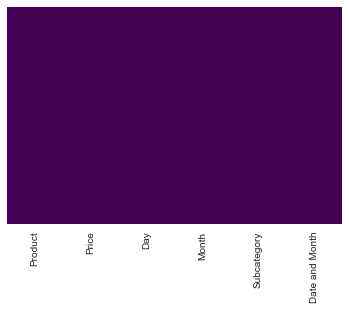

In [21]:
sns.heatmap(zs_ds_products.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

***The amount of products available per day***

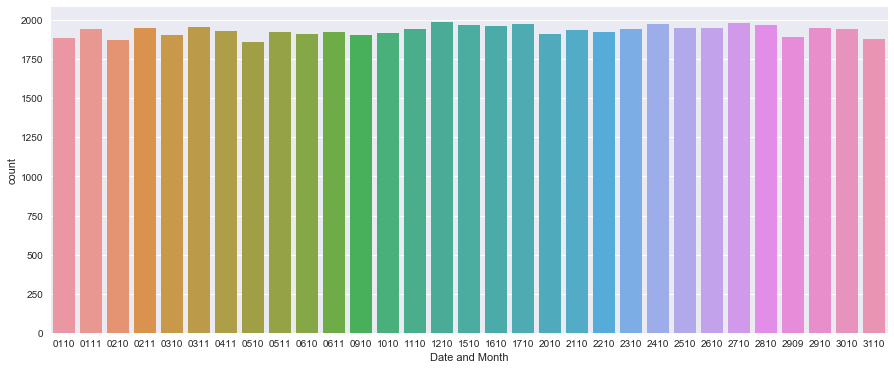

In [22]:
pylab.rcParams['figure.figsize'] = (15, 6)
sns.countplot(x = 'Date and Month', data = zs_ds_products)

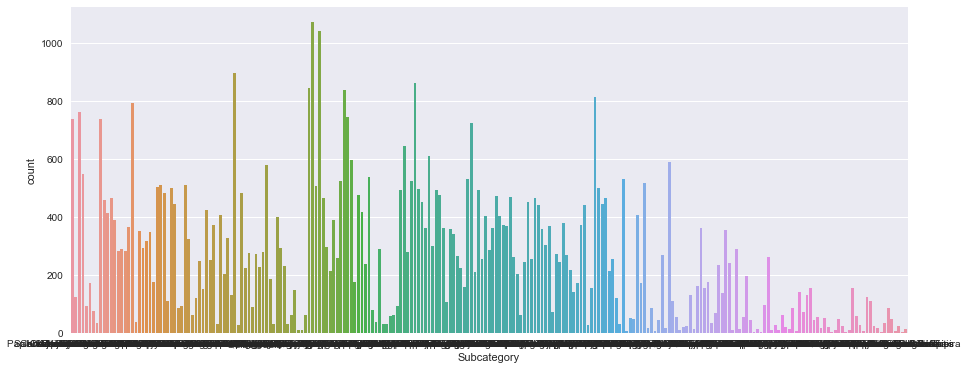

In [23]:
pylab.rcParams['figure.figsize'] = (15, 6)
sns.countplot(x = 'Subcategory', data = zs_ds_products)

***Price mean per month***

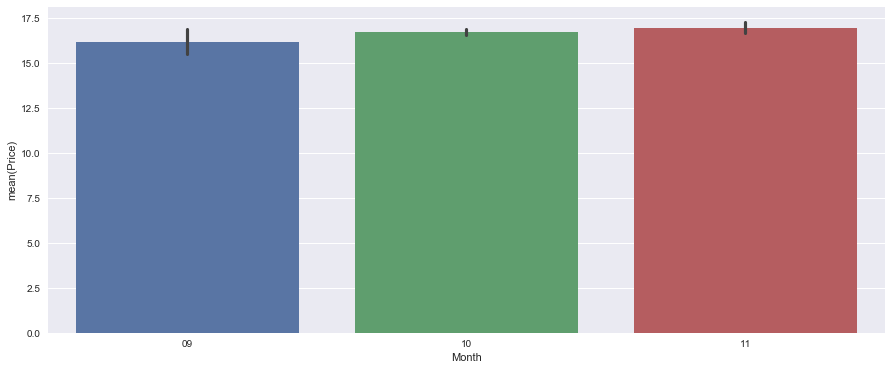

In [24]:
sns.barplot(x = 'Month', y = 'Price', data = zs_ds_products)

***Price mean per subcategory***

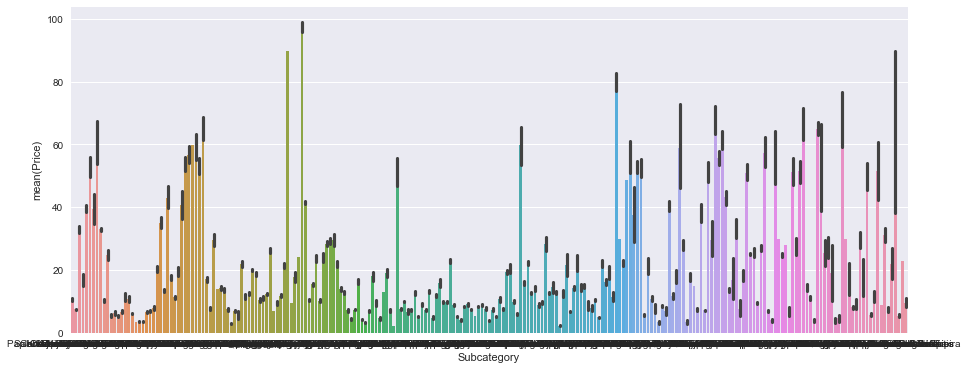

In [25]:
pylab.rcParams['figure.figsize'] = (15, 6)
sns.barplot(x = 'Subcategory', y = 'Price', data = zs_ds_products)